# 快速预览  说明

摘自[xarray官方文档(github)](https://github.com/pydata/xarray/blob/stable/doc/quick-overview.rst)\
或是[xarray网站](http://xarray.pydata.org/en/stable/quick-overview.html)

照抄官方文档一遍用作练习，原本的ipython的命令序号不做更改

这是一些您可以使用`xarray.DataArray`对象做什么的快速示例。在文档的其余部分中，将对所有内容进行更详细的说明。

首先，使用其惯用缩写导入numpy，pandas和xarray：

In [1]:
In [1]: import numpy as np

In [2]: import pandas as pd

In [3]: import xarray as xr

# 创建一个DataArray

您可以通过以numpy数组或列表的形式提供数据，并用可选的尺寸和坐标来从头开始创建DataArray ：

In [2]:
In [4]: data = xr.DataArray(np.random.randn(2, 3),
   ...:                     dims=('x', 'y'),
   ...:                     coords={'x': [10, 20]})
   ...: 

In [5]: data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.38238768,  1.93813577, -0.72916752],
       [-1.8317871 , -1.12070113,  0.72537722]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

在这种情况下，我们生成了一个2D数组，分别将名称x和y分配给两个维度，并将两个坐标标签 “ 10”和“ 20”与沿x维度的两个位置相关联。  
如果提供```pandas Series```或```DataFrame```，则直接复制元数据：

In [3]:
In [6]: xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

下面是```DataArray```的关键属性:

values

In [4]:
# like in pandas, values is a numpy array that you can modify in-place
In [7]: data.values

array([[ 0.38238768,  1.93813577, -0.72916752],
       [-1.8317871 , -1.12070113,  0.72537722]])

dims

In [5]:
In [8]: data.dims

('x', 'y')

coords

In [6]:
In [9]: data.coords

Coordinates:
  * x        (x) int64 10 20

.attrs  
you can use this dictionary to store arbitrary metadata (~~真的可以么？~~)

In [7]:
In [10]: data.attrs

{}

# 索引

xarray支持四种索引。  
由于我们已经为x维度分配了坐标标签，因此我们可以像pandas一样沿着该维度使用基于标签的索引。  
下面的四个示例都产生相同的结果（x = 10处的值），但是便利性和直观性有所不同。

-  positional and by integer label, like numpy

In [8]:
In [11]: data[0, :]

<xarray.DataArray (y: 3)>
array([ 0.38238768,  1.93813577, -0.72916752])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

-  loc or "location": positional and coordinate label, like pandas

In [37]:
In [12]: data.loc[10]

<xarray.DataArray (y: 3)>
array([ 0.38238768,  1.93813577, -0.72916752])
Coordinates:
    x        int64 10
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

-  isel or "integer select":  by dimension name and integer label

In [38]:
In [13]: data.isel(x=0)

<xarray.DataArray (y: 3)>
array([ 0.38238768,  1.93813577, -0.72916752])
Coordinates:
    x        int64 10
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

-  sel or "select": by dimension name and coordinate label

In [39]:
In [14]: data.sel(x=10)

<xarray.DataArray (y: 3)>
array([ 0.38238768,  1.93813577, -0.72916752])
Coordinates:
    x        int64 10
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

与位置索引不同，基于标签的索引使我们不必知道数组的组织方式。我们只需要知道维名称和我们希望索引的标签即可，i.e.```data.sel(x=10)```，无论其```x```是数组的第一维还是第二维，以及```10```是```x```的第一个或第二个元素都可以使用。  
我们已经告诉xarray创建时x是```data```第一个维度：xarray会对此进行跟踪，因此我们不必这样做。有关更多信息，请参见[索引和选择数据](https://github.com/pydata/xarray/blob/stable/doc/quick-overview.rst#id7)。

# 属性

设置DataArray时，设置元数据属性通常是一个好主意。  
一个有用的选择是设置```data.attrs['long_name']```，```data.attrs['units']```。因为xarray将使用这些（如果存在）来自动标记绘图。这些特殊名称是根据[NetCDF气候和预报（CF）元数据公约选择的](http://cfconventions.org/cf-conventions/cf-conventions.html)。  
```attrs```是Python字典，因此您可以分配任何您想要的东西。

In [12]:
data.attrs['long_name'] = 'random velocity'
data.attrs['units'] = 'metres/sec'
data.attrs['description'] = 'A random variable created as an example.'
data.attrs['random_attribute'] = 123
data.attrs

{'long_name': 'random velocity',
 'units': 'metres/sec',
 'description': 'A random variable created as an example.',
 'random_attribute': 123}

你同样可以将metadata设置到坐标上

In [13]:
data.x.attrs['units'] = 'x units'

# 计算方式

数据数组的工作方式与numpy ndarrays非常相似：

In [14]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[10.38238768, 11.93813577,  9.27083248],
       [ 8.1682129 ,  8.87929887, 10.72537722]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [15]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.37313677,  0.93328614, -0.66624906],
       [-0.9661348 , -0.90040569,  0.66341774]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [16]:
# transpose
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[ 0.38238768, -1.8317871 ],
       [ 1.93813577, -1.12070113],
       [-0.72916752,  0.72537722]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [17]:
data.sum()

<xarray.DataArray ()>
array(-0.63575508)

但是，聚合操作可以使用维度名称代替轴号：

In [18]:
data.mean(dim='x')

<xarray.DataArray (y: 3)>
array([-0.72469971,  0.40871732, -0.00189515])
Dimensions without coordinates: y

根据**维名称**广播算术运算。这意味着您无需插入虚拟尺寸即可对齐：（和numpy数组索引相区别，这事和NCL接近的一点）

In [19]:
a = xr.DataArray(np.random.randn(3), [data.coords['y']])
b = xr.DataArray(np.random.randn(4), dims='z')

In [20]:
a

<xarray.DataArray (y: 3)>
array([-1.65088444, -1.28075706,  0.92428103])
Coordinates:
  * y        (y) int64 0 1 2

In [21]:
b

<xarray.DataArray (z: 4)>
array([ 0.34965888, -0.60789069, -0.81621993, -1.71076757])
Dimensions without coordinates: z

In [22]:
a+b

<xarray.DataArray (y: 3, z: 4)>
array([[-1.30122555, -2.25877513, -2.46710437, -3.36165201],
       [-0.93109818, -1.88864776, -2.096977  , -2.99152464],
       [ 1.27393991,  0.31639034,  0.1080611 , -0.78648654]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: z

这也意味着在大多数情况下，您无需担心维度顺序：

In [24]:
data - data.T # 并未进行广播，因为维度名称的对应

<xarray.DataArray (x: 2, y: 3)>
array([[0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

操作还根据索引标签对齐(这里直接用位置索引)

In [30]:
data[:-1] - data[:1]

<xarray.DataArray (x: 1, y: 3)>
array([[0., 0., 0.]])
Coordinates:
  * x        (x) int64 10
Dimensions without coordinates: y

更多信息，请参考[计算](https://github.com/pydata/xarray/blob/stable/doc/quick-overview.rst#id9)

# 分组

xarray使用与pandas非常相似的API支持分组操作（请参阅[GroupBy：split-apply-combine](http://xarray.pydata.org/en/stable/groupby.html#groupby)）：

In [33]:
labels = xr.DataArray(['E', 'F', 'E'], [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [59]:
data.groupby(labels).mean('y') # 由labels的E,F进行了分组

<xarray.DataArray (x: 2, labels: 2)>
array([[-0.17338992,  1.93813577],
       [-0.55320494, -1.12070113]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'

In [60]:
data.groupby(labels).map(lambda x: x - x.min()) # 应用到一个定义的lambda函数上

<xarray.DataArray (x: 2, y: 3)>
array([[2.21417478, 3.0588369 , 1.10261958],
       [0.        , 0.        , 2.55716432]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

# 绘图

快速方便的可视化（临时）

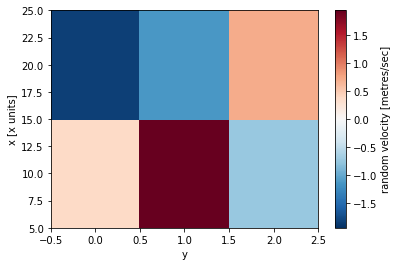

In [61]:
data.plot()

# Pandas

使用```to_series()```,```to_dataframe()```,```to_xarray()```方法，可以轻松地将Xarray对象与pandas对象进行相互转换：

In [63]:
series = data.to_series()
series

x   y
10  0    0.382388
    1    1.938136
    2   -0.729168
20  0   -1.831787
    1   -1.120701
    2    0.725377
dtype: float64

In [64]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.38238768,  1.93813577, -0.72916752],
       [-1.8317871 , -1.12070113,  0.72537722]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) int64 0 1 2

# Dataset

```xarray.Dataset```是类似dict的对齐的```DataArray```对象容器。您可以将其视为```pandas.DataFrame```的多维概括：

In [66]:
ds = xr.Dataset({'foo': data, 'bar': ('x', [1, 2]), 'baz': np.pi})
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.3824 1.938 -0.7292 -1.832 -1.121 0.7254
    bar      (x) int64 1 2
    baz      float64 3.142

这将创建一个Dataset，包含三个名为```foo```，```bar```和```baz```的DataArrays。使用字典或点索引将```Dataset```变量作为```DataArray```对象提取出来，但请注意赋值仅适用于字典索引(~~并未理解只适用于和直接用方法写出的差异~~)：

In [88]:
ds['foo']

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[ 0.38238768,  1.93813577, -0.72916752],
       [-1.8317871 , -1.12070113,  0.72537722]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [90]:
ds.foo.values

array([[ 0.38238768,  1.93813577, -0.72916752],
       [-1.8317871 , -1.12070113,  0.72537722]])

在创建```ds```时，我们指定```foo```与先前创建的```data```相同，```bar```具有单个维```x```,并且其值分别为'1'和'2'，```baz```是不与```ds```中的任何维相关联的标量。  
数据集中的变量可以具有不同dtype甚至不同的维度，但是所有维度都引用同一共享坐标系中的点，即，如果两个变量具有维度x，则该维度在两个变量中必须相同。

例如，当创建```ds``` xarray自动对齐 ```bar```和```DataArray``` ```foo```，即，它们共享同一个坐标系，使```ds.bar['x'] == ds.foo['x'] == ds['x']xds['bar']```。因此，没有在创建```ds['bar]```时明确指定```x```坐标的话，下面也能生效：

In [91]:
ds.bar.sel(x=10)

<xarray.DataArray 'bar' ()>
array(1)
Coordinates:
    x        int64 10

如果您希望一次使用多个变量，几乎可以对Dataset对象（包括索引和算术）执行所有能在DataArray对象上进行的操作。

# 读写netCDF文件

NetCDF是xarray对象的推荐文件格式。来自地球科学的用户将认识到，Dataset数据模型看起来与netCDF文件非常相似（实际上是它的灵感来源）。

您可以直接通过```to_netcdf()```，```open_dataset()```,```open_dataarray()```读取写xarray对象到磁盘：

In [92]:
ds.to_netcdf('example.nc')

In [93]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 ...
    bar      (x) int64 ...
    baz      float64 ...

数据集通常分布在多个文件中（每个时间步通常一个文件）。xarray通过提供```open_mfdataset()```和```save_mfdataset()```方法来支持。有关更多信息，请参见[读取和写入文件](http://xarray.pydata.org/en/stable/io.html#io)。